<a href="https://colab.research.google.com/github/LakshmiSrivastava/DSML-mlops-streamlit-jan05/blob/main/car24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR&authuser=0')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df['make'].nunique()

41

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Y = df['selling_price']

In [ ]:
df = df.drop(columns =['selling_price'])
df.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
Y

0         1.20
1         5.50
2         2.15
3         2.26
4         5.70
         ...  
19815     6.50
19816     9.25
19817     4.25
19818    12.25
19819    12.00
Name: selling_price, Length: 19820, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(19820, 17)

In [ ]:
Y.shape

(19820,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=True)

In [ ]:
X_train.shape, y_train.shape

((15856, 17), (15856,))

In [ ]:
X_test.shape, y_test.shape

((3964, 17), (3964,))

In [ ]:
X1_train = X_train[['max_power']]
X1_test = X_test[['max_power']]

In [ ]:
X1_train.head()

,max_power
5576,0.195169
6660,0.123671
19635,0.158615
11403,0.136618
8799,0.111111


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([51.09139877])

In [ ]:
model.intercept_

-1.0871408160423623

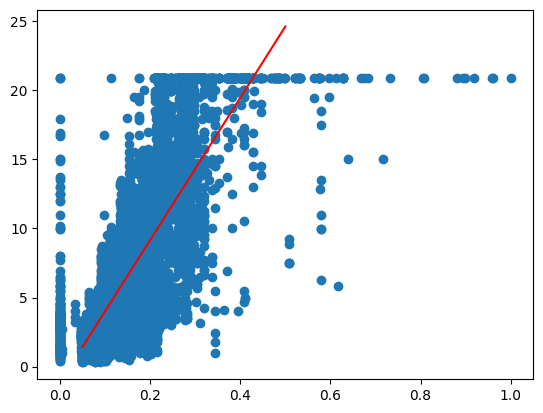

In [ ]:
plt.scatter(X1_train, y_train)
plt.plot([0.05,0.5] , [1.42, 24.61], c='red')

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 1.51819172e+13, -5.97656250e+00, -5.20620479e+00,  1.35260466e+00,
        1.01149352e+00,  1.51819172e+13,  1.43466203e+00,  1.76135469e+01,
       -1.42827885e-01, -1.15646521e-01,  1.27451139e-01,  2.65626633e+00,
        2.52189275e-01, -1.71172140e-01, -6.80359002e-02, -3.35577740e-01,
       -4.90970359e-01])

In [ ]:
model.intercept_

-15181917166779.719

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred[:5]

array([1.2890625 , 4.7265625 , 5.93359375, 3.2578125 , 4.99804688])

In [ ]:
y_test[:5]

14690    1.35
134      4.15
4982     4.90
11940    3.31
10861    5.80
Name: selling_price, dtype: float64

In [ ]:
# MSE score for test data.
np.mean((Y_pred - y_test)**2)

1.19513998066937

In [ ]:
model.score(X_test, y_test)

0.9501182131419396